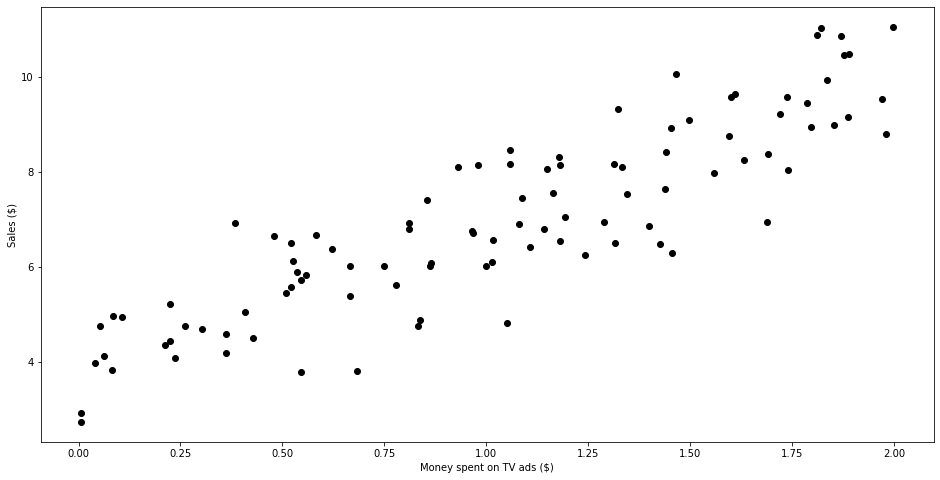

In [1]:
import numpy as np
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [15]:

X_b = np.c_[np.ones((100, 1)), X]
n_epochs = 50
t0, t1 = 5, 50
m = 100

# learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

count = 0
theta_list = []
theta = np.random.randn(2,1)
# random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        if count == i:
            theta_list.append(theta)
            count += 20

In [16]:
theta

array([[3.8291694],
       [3.0338234]])

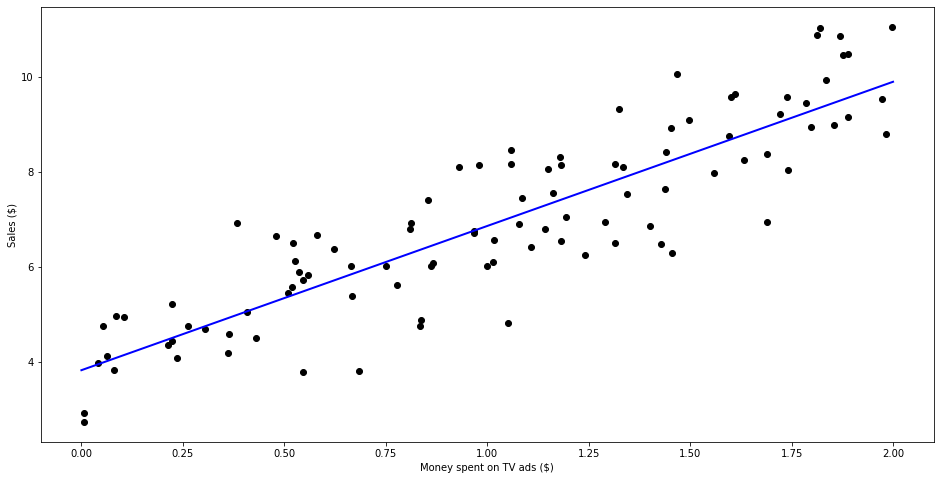

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)



plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X_new,
    y_predict,
    c='blue',
    linewidth=2
)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [18]:
theta_list

[array([[1.96522922],
        [2.07069233]]),
 array([[3.91166475],
        [3.1574978 ]]),
 array([[3.80431554],
        [3.37705919]]),
 array([[3.51621342],
        [2.92467575]]),
 array([[3.42734071],
        [2.75444269]])]

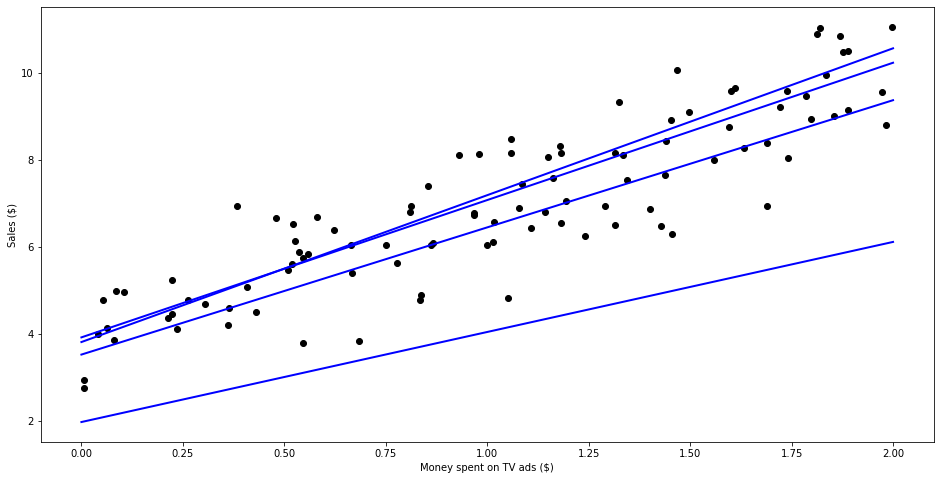

In [19]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict1 = X_new_b.dot(theta_list[0])
y_predict2 = X_new_b.dot(theta_list[1])
y_predict3 = X_new_b.dot(theta_list[2])
y_predict4 = X_new_b.dot(theta_list[3])

plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X_new,
    y_predict1,
    c='blue',
    linewidth=2
)
plt.plot(
    X_new,
    y_predict2,
    c='blue',
    linewidth=2
)
plt.plot(
    X_new,
    y_predict3,
    c='blue',
    linewidth=2
)
plt.plot(
    X_new,
    y_predict4,
    c='blue',
    linewidth=2
)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()